<a href="https://colab.research.google.com/github/subClassy/ners/blob/main/notebooks/car-itw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html --upgrade 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.3 MB/s eta 0:12:38tcmalloc: large alloc 1147494400 bytes == 0x55c044c66000 @  0x7fed9e7db615 0x55c00bc3d3bc 0x55c00bd1e18a 0x55c00bc401cd 0x55c00bd32b3d 0x55c00bcb4458 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcb42c0 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcb0cd4 0x55c00bd33986 0x55c00bcb0350 0x55c00bd33986 0x55c00bcb0350 0x55c00bd33986 0x55c00bcb0350 0x55c00bc41f19 0x55c00bc85a79 0x55c00bc40b32 0x55c00bcb41dd 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcb0cd4 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcafeae 0x55c00bc419da 0x55c00bcb0108 0x55c00bcaf02f
     |██████████████████▌             | 1055.7 MB 1.3 MB/s eta 0:09:39tcmalloc: large alloc 1434370048 bytes == 0x55c0892bc000 @  0x7fed9e7db615 0x55c00bc3d3bc 0x55c00bd1e18a 0x55c00bc401cd 0x55c00bd32b3d 0x55c00bcb4458 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcb42c0 0x55c00bcaf02f 0x55c00bc41aba 0x55c00bcb0cd4 0x55c00bd33986 0x55c00bcb03

In [ ]:
%pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-mao1ql9h
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-mao1ql9h
  Running command git checkout -q 3fc3ea507bfbf7e1c2d5023a6db202698206f91d
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 596 kB 16.6 MB/s 
  Created wheel for pytorch3d: filename=pytorch3d-0.6.1-cp37-cp37m-linux_x86_64.whl size=31583257 sha256=fd9560d97ba8d409d2a9918df47d179a73885332a2304a31a8f6aacece7bcb52
  Stored in directory: /tmp/pip-ephem-wheel-cache-diqesnts/wheels/4c/03/f0/326bb241eb86a155a12f217c81e163fbba48424bb84fa22074
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220212-py3-none-any.whl size=61216 sha256=cff898cb4f9fe299911a27948becfbda3b6093fcc6ea0727ccb00e04d95ad88f
  Stored in directory: /root/.cache/pip/wheels/92/43/75/238d2a5d897274799f92b8938f3cd807a3ccd3c8f37c0a4725
Successfully built pytor

In [ ]:
!git clone https://github.com/jasonyzhang/ners.git
!mv ners ners_repo
!cp -r ners_repo/* .

Cloning into 'ners'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 294 (delta 79), reused 262 (delta 55), pack-reused 0
Receiving objects: 100% (294/294), 130.10 MiB | 30.29 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.4 MB 8.2 MB/s 
     |████████████████████████████████| 26.9 MB 1.4 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 640 kB 49.9 MB/s 
     |████████████████████████████████| 97 kB 4.5 MB/s 
     |████████████████████████████████| 843 kB 45.7 MB/s 
     |████████████████████████████████| 792 kB 48.7 MB/s 
     |████████████████████████████████| 380 kB 55.8 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=474c834ebe5860a034109bd6a0356b73a2552a86419a08f11e86a43a2ae67946
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5

In [ ]:
import os
import os.path as osp
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import pytorch3d as p3d

if sys.path[0] != "..":
    sys.path.insert(0, "..")

from ners import Ners, load_data_from_dir
from ners.pytorch3d import PerspectiveCameras, get_renderers
from ners.models import pretrain_template_uv, shape_model_to_mesh, TemplateUV

# Demo Notebook for NeRS

This notebook generates a NeRS model given images, masks, a cuboid initialization (user specified), and coarse poses (user specified).


Compute requirements: ~3-4 GPUs

Data requirements:
* Images: try to take 8-10 images, roughly in a turntable, under consistent illumination.
* Masks: you can use your favorite segmentation tool, such as [PointRend](https://github.com/facebookresearch/detectron2/tree/main/projects/PointRend) or [my interactive interface for GrabCut](https://github.com/jasonyzhang/interactive_grabcut).

File structure:
```
INPUT_DIR
|_ images
|___ image1.jpg
|___ ...
|_ masks
|___ image1.png  <- should have same filename as the images
|___ ...
```

Manual Input:
* Extents of the cuboid initialization
* Roughly binned camera poses (azimuth and elevation)

Lines that require manual input will have a `# TODO: Set this.`

Timings on 4x1080 TIs:
* Stage 1: 1.5 min
* Stage 2: 1.5 min
* Stage 3: 30 min
* Stage 4: 10 min
* Render a video: 4 min

In [ ]:
device = torch.device("cuda:0")

INPUT_DIR = "./data/54b89bb4ed5aa492e23d60a1b706b44f/"  # TODO: Set this.
OUTPUT_DIR = osp.join("./output", osp.basename(osp.normpath(INPUT_DIR)))

os.makedirs(OUTPUT_DIR, exist_ok=True)

renderer_textured, renderer_silhouette = get_renderers(device=device)

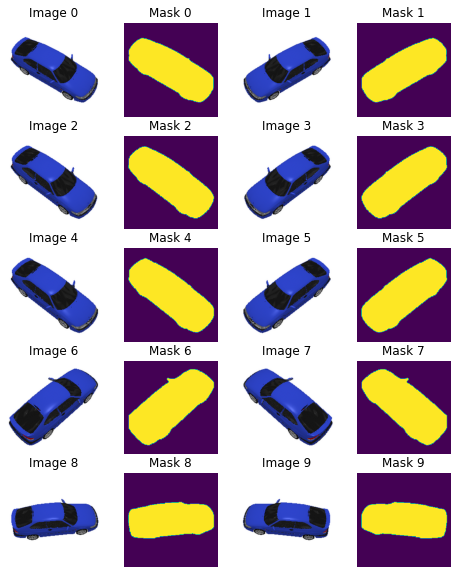

In [13]:
# Visualize the images and masks.

data = load_data_from_dir(INPUT_DIR)

n = len(data["images"])
num_rows = (n - 1) // 2 + 1
fig, axs = plt.subplots(num_rows, 4, figsize=(8, num_rows * 2))
axs = axs.flatten()
for i in range(n):
    image = data["images"][i]
    mask = data["masks"][i]
    axs[i * 2].imshow(image)
    axs[i * 2].set_title(f"Image {i}")
    axs[i * 2 + 1].imshow(mask)
    axs[i * 2 + 1].set_title(f"Mask {i}")
for ax in axs:
    ax.axis("off")

In [14]:
# TODO: Set this.
# Try to keep the largest dimension around 1.
template_extents = [0.7, 1, 1]  # [W, H, D].


# Pre-train the template shape.
f_template = pretrain_template_uv(
    template_uv=TemplateUV(),
    extents=template_extents,
    device=device,
)
template_mesh = shape_model_to_mesh(f_template)

# Save template shape.
template_path = osp.join(OUTPUT_DIR, "template.pth")
torch.save(f_template.state_dict(), template_path)

  0%|          | 0/1000 [00:00<?, ?it/s]

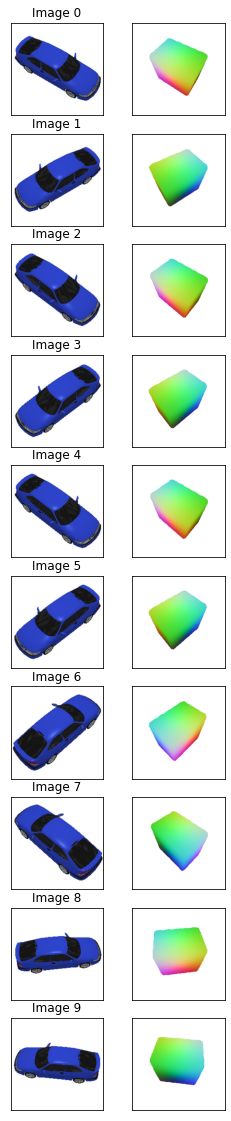

In [15]:
# TODO: Set this.
azimuths = [123, 237, 130, 230, 131, 229, 45, 315, 83, 277]  # In Degrees.
# TODO: Set this.
elevations = [57, 57, 57, 57, 57, 57, 57, 57, 57, 57]  # In Degrees.

R, T = p3d.renderer.look_at_view_transform(
    dist=2,
    elev=elevations,
    azim=azimuths,
    device=device,
)
cameras = PerspectiveCameras(
    device=device,
    R=R,
    T=T,
    fov=60,
)

N = len(cameras)

rend = renderer_textured(template_mesh.extend(N), cameras=cameras)
fig, axs = plt.subplots(N, 2, figsize=(4, N * 2))
for i, (im, r) in enumerate(zip(data["images"], rend.detach().cpu()[..., :3])):
    axs[i, 0].imshow(im)
    axs[i, 0].set_title(f"Image {i}")
    axs[i, 1].imshow(r)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

In [16]:
ners = Ners(
    images=data["images"],
    masks=data["masks"],
    masks_dt=data["masks_dt"],
    initial_poses=R.tolist(),
    image_center=data["image_centers"],
    crop_scale=data["crop_scales"],
    f_template=f_template,
    symmetrize=False,  # TODO: Set this to False for non-symmetric objects.
    num_layers_tex=12,
)

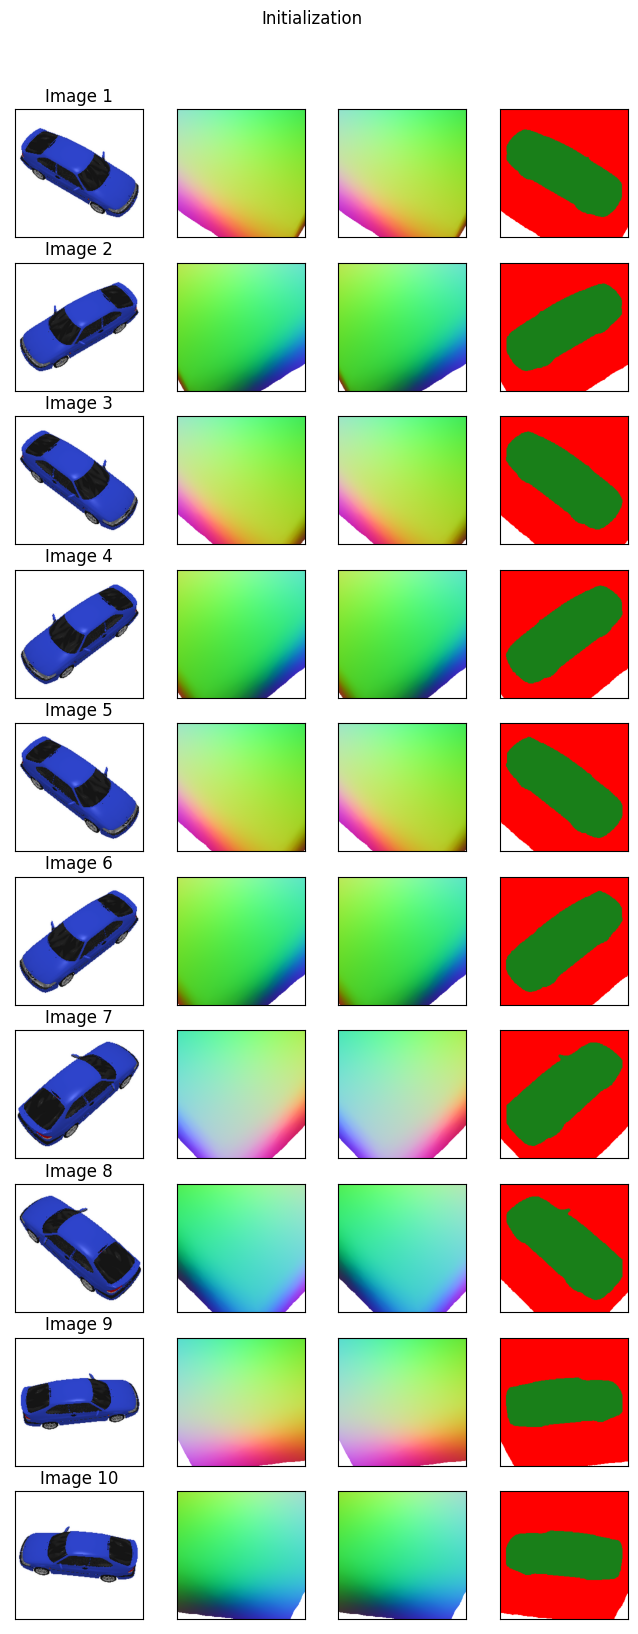

In [17]:
ners.visualize_input_views(title="Initialization")

  0%|          | 0/500 [00:00<?, ?it/s]

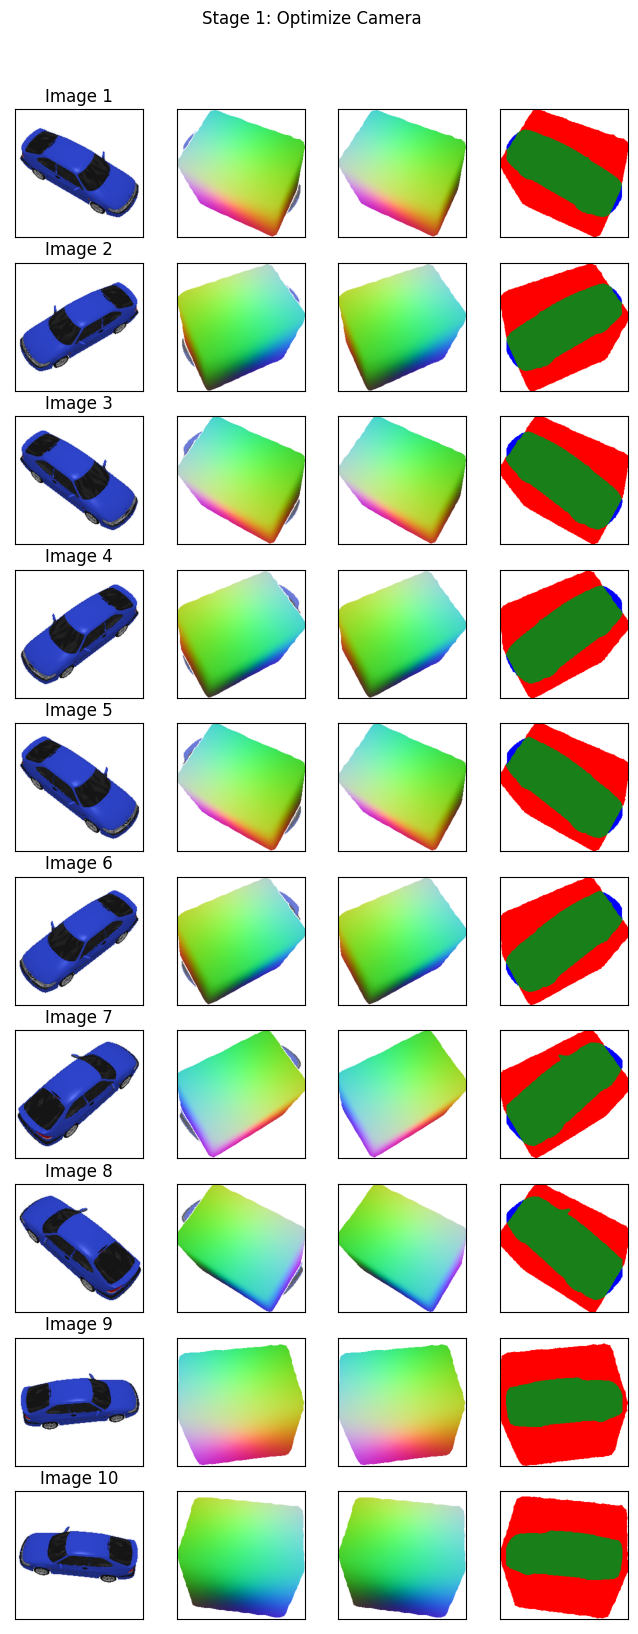

In [18]:
ners.optimize_camera()
ners.visualize_input_views(title="Stage 1: Optimize Camera")

  0%|          | 0/500 [00:00<?, ?it/s]

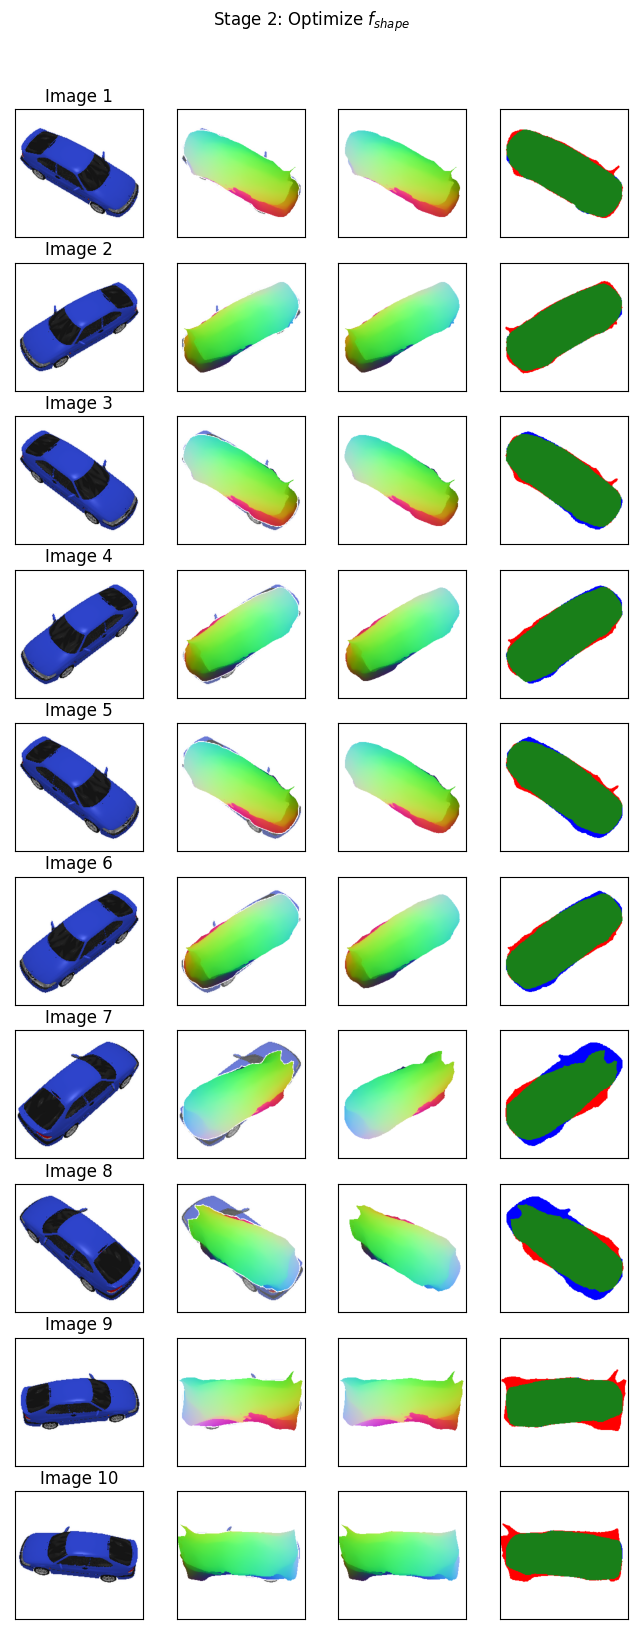

In [19]:
ners.optimize_shape()
ners.visualize_input_views(title="Stage 2: Optimize $f_{shape}$")

  0%|          | 0/3000 [00:00<?, ?it/s]

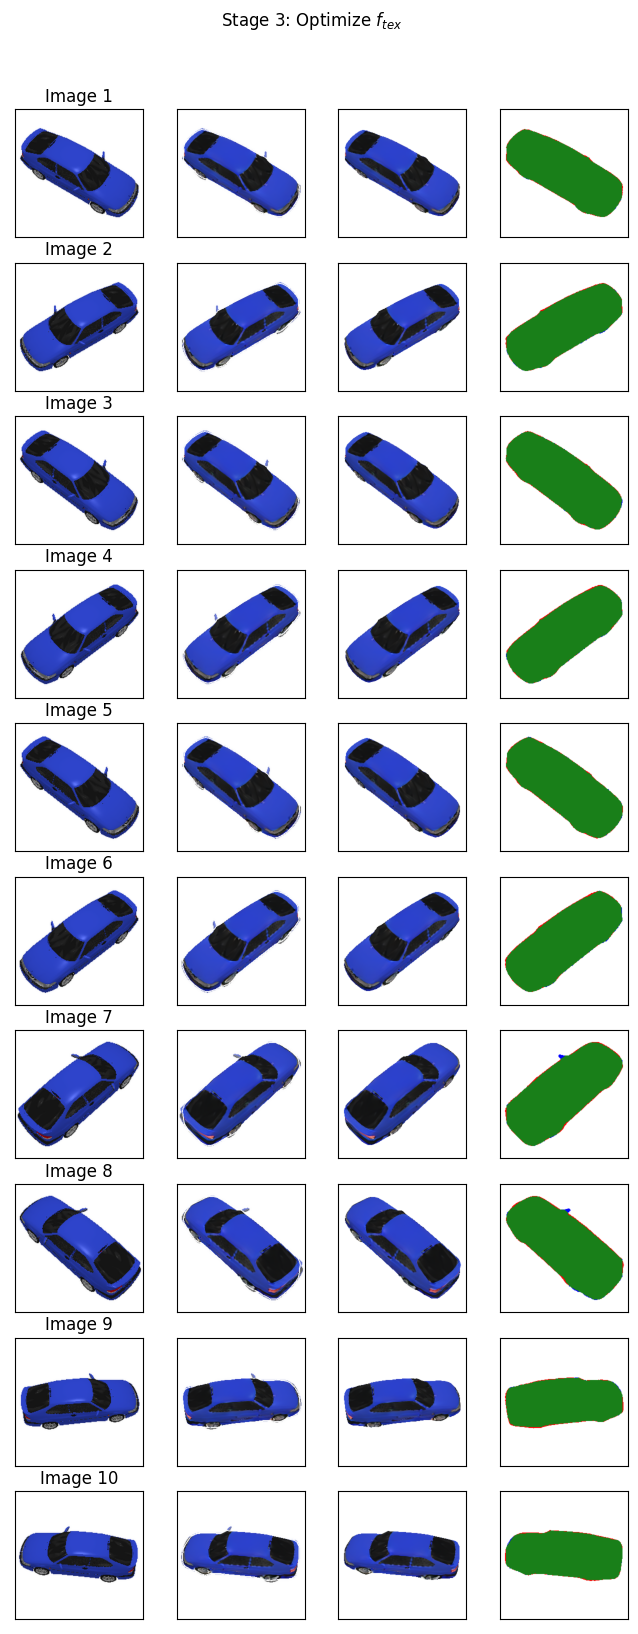

In [20]:
ners.optimize_texture(3000)
ners.visualize_input_views(title="Stage 3: Optimize $f_{tex}$")

In [21]:
# Output 3D Mesh
mesh_path = osp.join(OUTPUT_DIR, "mesh.obj")
ners.save_obj(mesh_path)

In [ ]:
OUTPUT_DIR

'./output/54b89bb4ed5aa492e23d60a1b706b44f'

  0%|          | 0/500 [00:00<?, ?it/s]

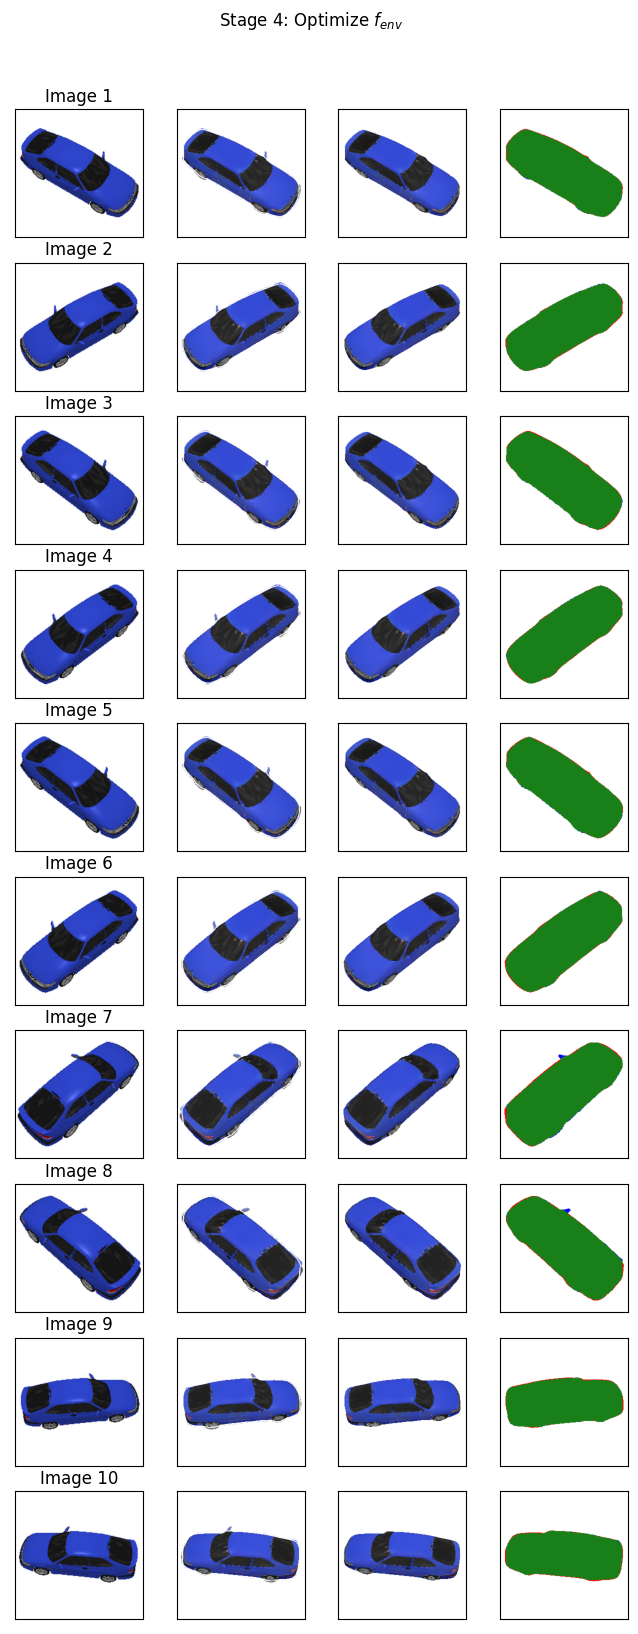

In [23]:
ners.optimize_radiance()
ners.visualize_input_views(title="Stage 4: Optimize $f_{env}$")

In [24]:
# Output 360 degree video.
video_path = osp.join(OUTPUT_DIR, "video")
ners.make_video(video_path, image_size=512)

Video:   0%|          | 0/360 [00:00<?, ?it/s]

In [25]:
from IPython.display import Video

Video(video_path + ".mp4", embed=True, width=600)